**Step 1: Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


**Step 2: Load the Dataset**

In [2]:
df = pd.read_csv('/content/Malware dataset.csv')
df.head()


,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


**Step 3: Exploratory Data Analysis (EDA)**

1. Check for Missing Values:

In [3]:
df.isnull().sum()


,0
hash,0
millisecond,0
classification,0
state,0
usage_counter,0
prio,0
static_prio,0
normal_prio,0
policy,0
vm_pgoff,0


2. Visualize the Target Variable:

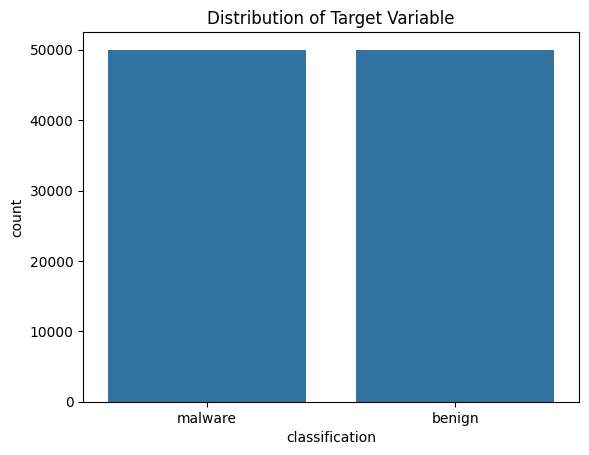

In [4]:
sns.countplot(x='classification', data=df)
plt.title('Distribution of Target Variable')
plt.show()


In [5]:
df.shape

(100000, 35)

In [6]:
df.describe()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000.000000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
mean,499.500000,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,15312.739510,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,288.676434,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,3256.475008,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,0.000000,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,9695.000000,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,249.750000,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,12648.000000,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,499.500000,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,15245.000000,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,749.250000,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,17663.000000,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0
max,999.000000,4.326605e+07,0.0,3.070222e+09,31855.000000,0.0,0.0,0.0,27157.000000,0.0,...,365.000000,256.000000,120.000000,18.000000,3.204448e+09,421913.000000,7.000000,15.00000,0.0,0.0


In [7]:
df.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

**Step 4: Data Preprocessing and Feature Engineering**

In [9]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'classification' is the non-numeric column
le = LabelEncoder()
df['classification'] = le.fit_transform(df['classification'])


In [10]:
df['classification'].value_counts()

,count
classification,
1,50000
0,50000


Convert Non-Numeric Columns (if they are categorical and meaningful)

Ensure Non-Numeric Columns Are Handled

In [11]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Drop non-numeric columns to create a numeric-only DataFrame
df_numeric = df.drop(columns=non_numeric_columns)


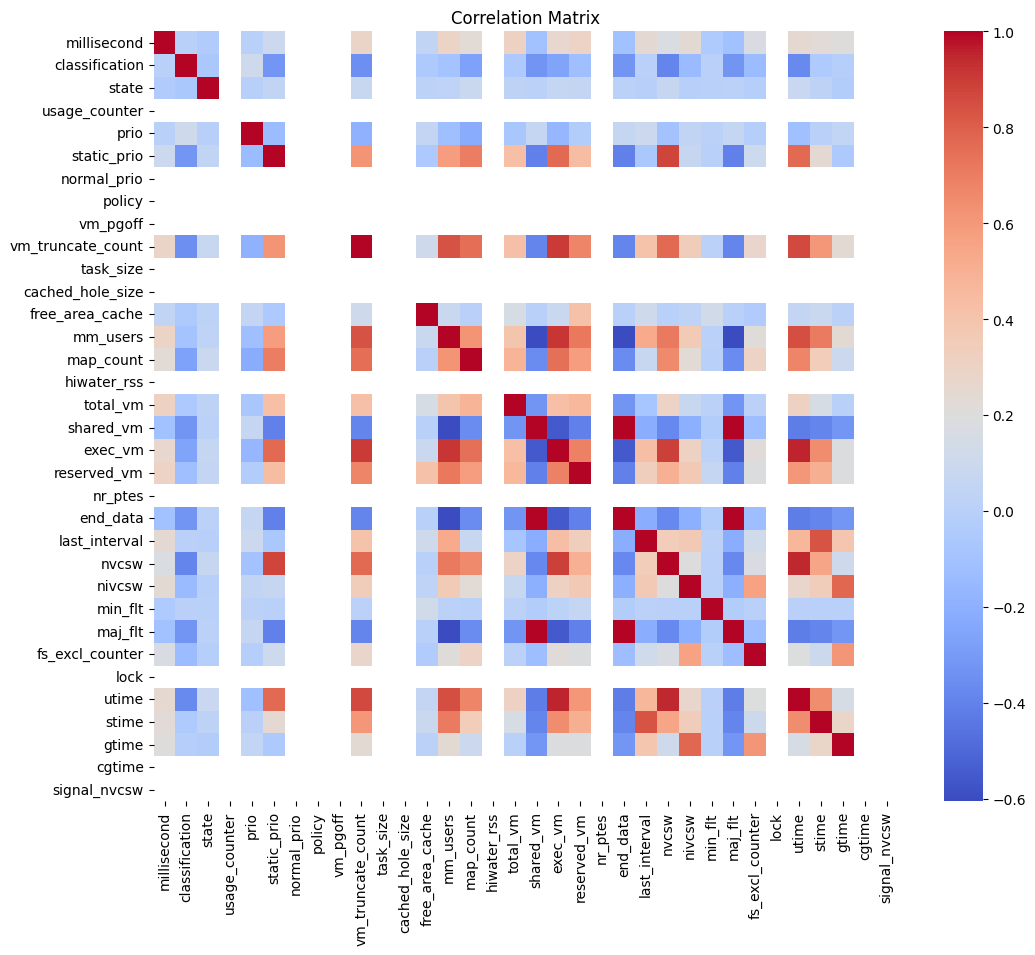

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Removing columns with no correlation

In [13]:
df = df.drop(
    columns = [
        'usage_counter',
        'normal_prio',
        'policy',
        'vm_pgoff',
        'task_size',
        'cached_hole_size',
        'hiwater_rss',
        'nr_ptes',
        'lock',
        'cgtime',
        'signal_nvcsw'
    ],
    axis = 1
)

In [14]:
df.shape

(100000, 24)

In [15]:
df = df.drop(
    columns = ['hash'],
    axis = 1
)

df.head()

,millisecond,classification,state,prio,static_prio,vm_truncate_count,free_area_cache,mm_users,map_count,total_vm,...,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,utime,stime,gtime
0,0,1,0,3069378560,14274,13173,24,724,6850,150,...,120,3473,341974,0,0,120,0,380690,4,0
1,1,1,0,3069378560,14274,13173,24,724,6850,150,...,120,3473,341974,0,0,120,0,380690,4,0
2,2,1,0,3069378560,14274,13173,24,724,6850,150,...,120,3473,341974,0,0,120,0,380690,4,0
3,3,1,0,3069378560,14274,13173,24,724,6850,150,...,120,3473,341974,0,0,120,0,380690,4,0
4,4,1,0,3069378560,14274,13173,24,724,6850,150,...,120,3473,341974,0,0,120,0,380690,4,0


In [16]:
correlation = df.corr()

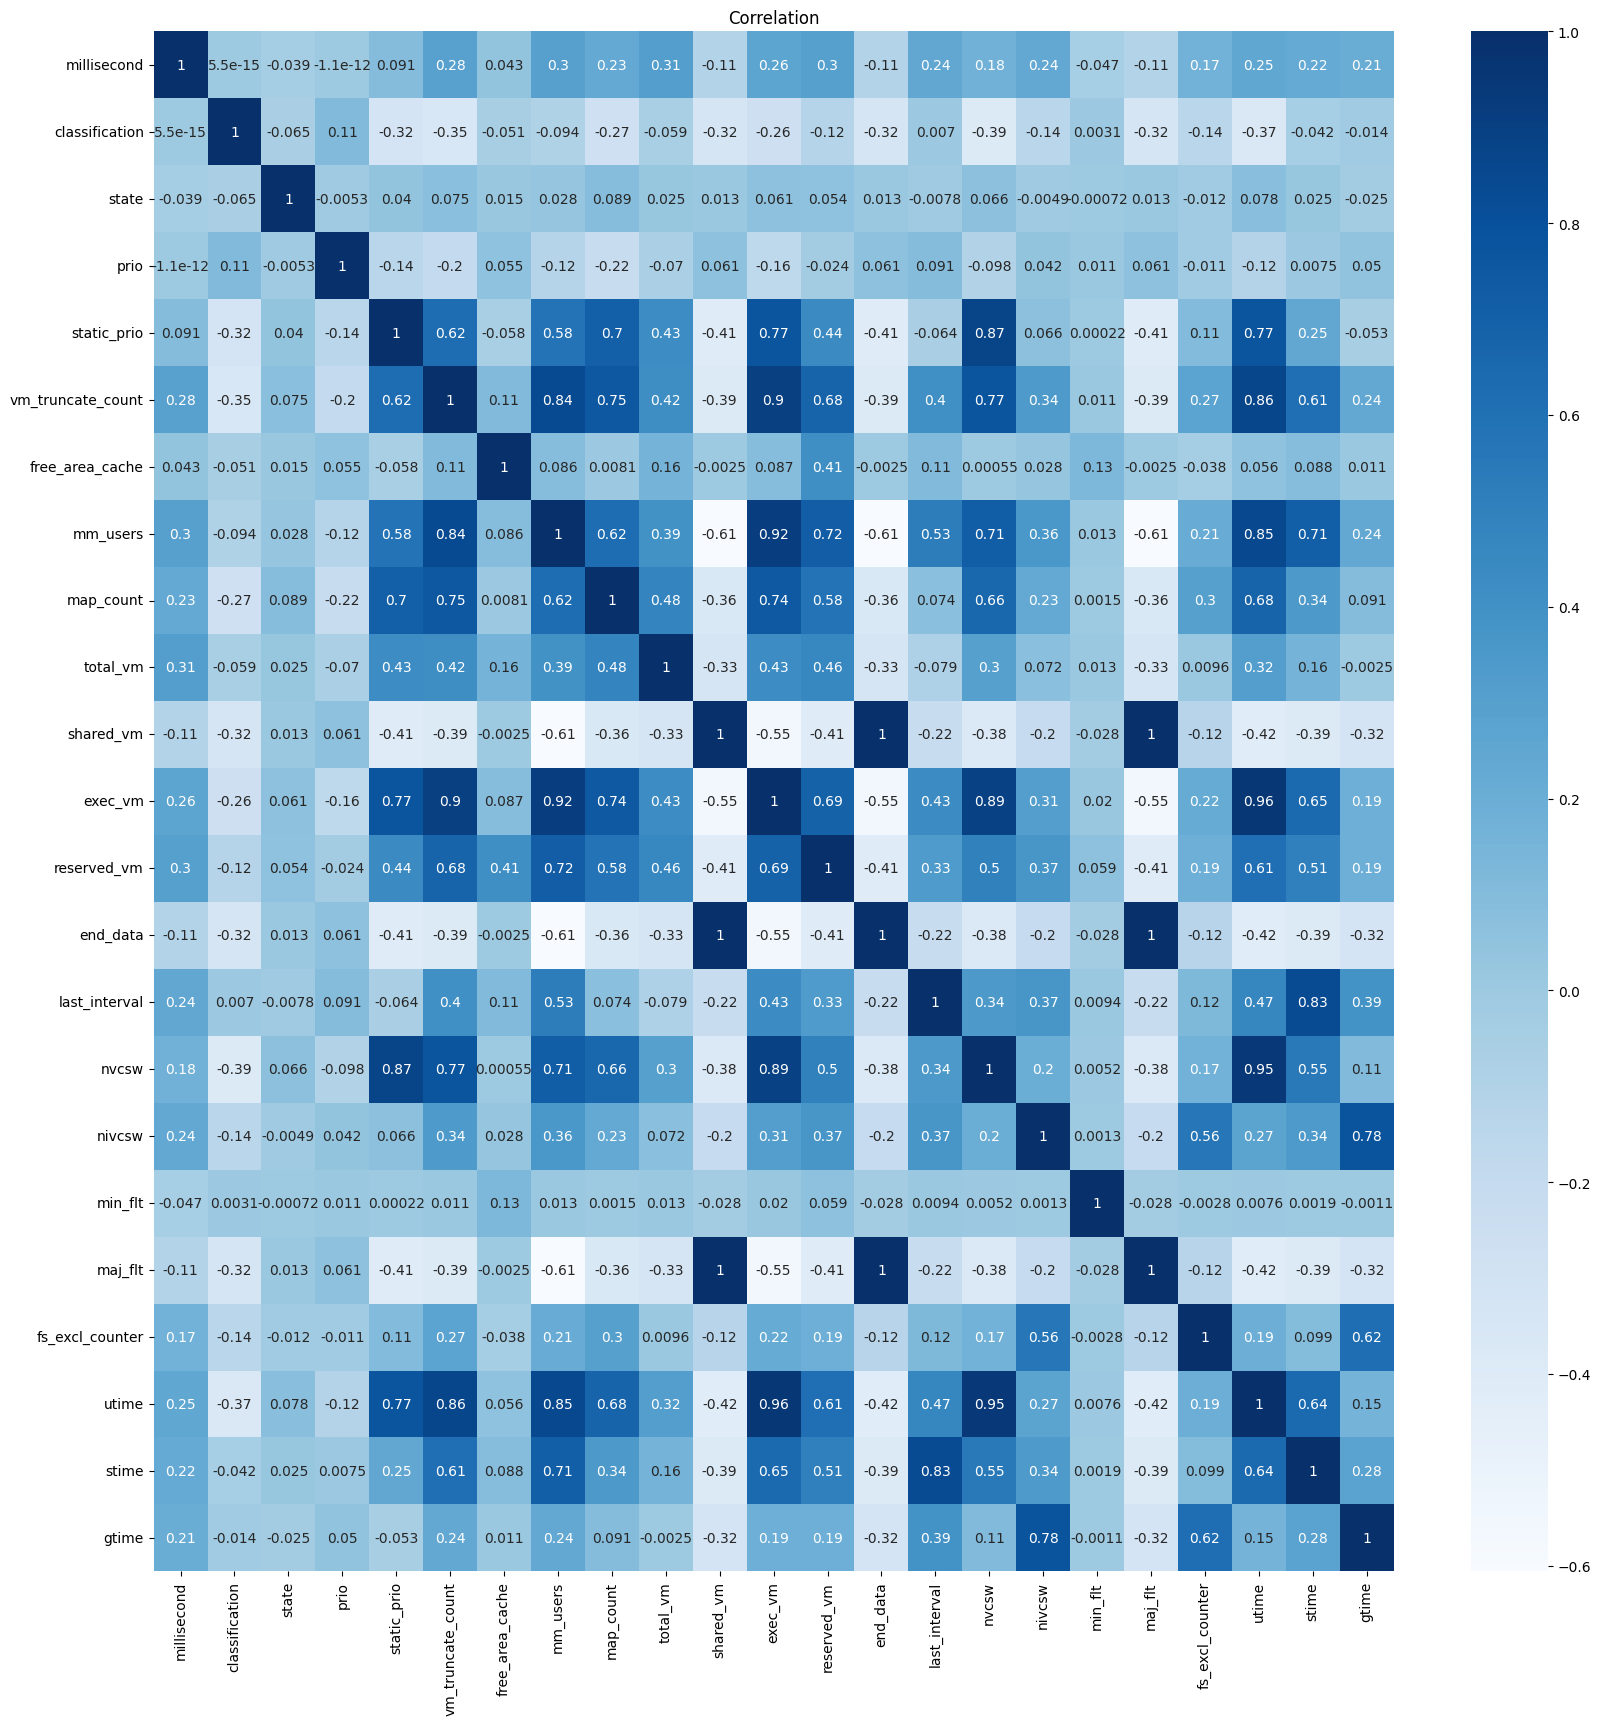

In [17]:
plt.figure(figsize = [20, 20])

sns.heatmap(
    correlation,
    annot = True,
    cmap = 'Blues'
)

plt.title("Correlation")
plt.show()

Label Encoding:

In [18]:
le = LabelEncoder()
df['classification'] = le.fit_transform(df['classification'])
df['classification'].value_counts()


,count
classification,
1,50000
0,50000


Feature Scaling:

In [19]:
scaler = StandardScaler()
X = df.drop('classification', axis=1)
y = df['classification']
X_scaled = scaler.fit_transform(X)

Feature Selection (Optional): Using Random Forest Algorithm

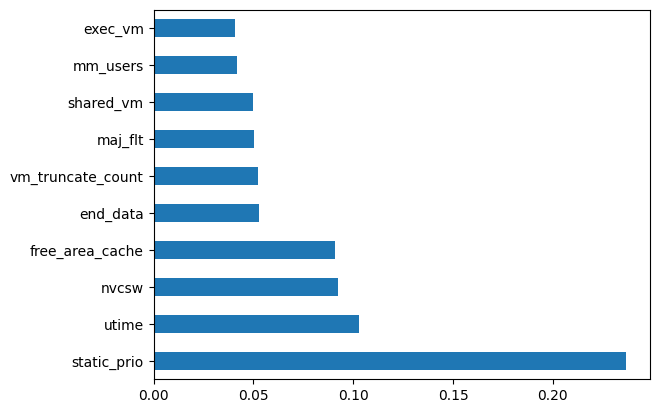

In [20]:
rf = RandomForestClassifier()
rf.fit(X, y)
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


**Step 5: Dataset Split**

Split the dataset into training and testing sets.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


**Step 6: Supervised Learning (Random Forest Classifier)**

1. Train the Model:

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

2. Predict and Evaluate:

In [23]:
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14969
           1       1.00      1.00      1.00     15031

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [24]:
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Accuracy: 100.00%


3. Confusion Matrix:

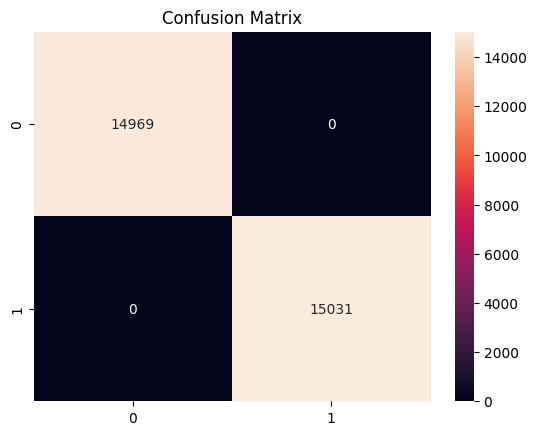

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.show()


**Step 7: Neural Network**

1. Build the Model:

In [26]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2. Train the Model:

In [27]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8966 - loss: 0.2445 - val_accuracy: 0.9940 - val_loss: 0.0203
Epoch 2/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9901 - loss: 0.0298 - val_accuracy: 0.9979 - val_loss: 0.0061
Epoch 3/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9952 - loss: 0.0156 - val_accuracy: 0.9983 - val_loss: 0.0042
Epoch 4/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9962 - loss: 0.0114 - val_accuracy: 0.9981 - val_loss: 0.0042
Epoch 5/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9970 - loss: 0.0101 - val_accuracy: 0.9990 - val_loss: 0.0063
Epoch 6/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9967 - loss: 0.0088 - val_accuracy: 0.9990 - val_loss: 0.0021
Epoch 7/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9994 - val_loss: 0.0018
Epoch 8/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9981 - loss: 0.0060

3. Evaluate the Model:

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.7815e-04
Test Accuracy: 100.00%


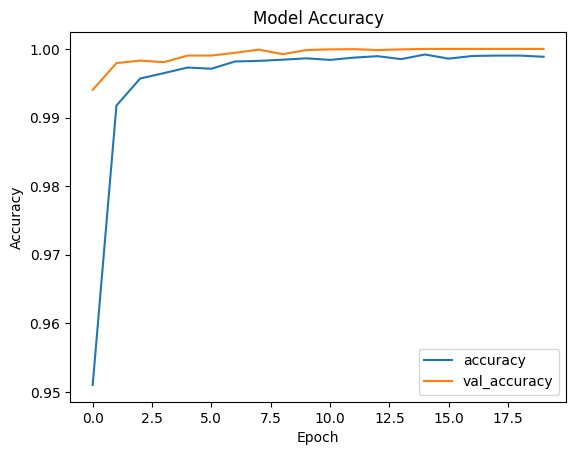

In [28]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='lower right')
plt.show()


**Step 8: Unsupervised Learning (K-Means Clustering)**

1. Train K-Means:

In [29]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

2. Evaluate Clustering:

In [30]:
# Compare clusters with actual labels
clusters = kmeans.labels_
print("Clustering Accuracy:", accuracy_score(y, clusters))


Clustering Accuracy: 0.53543
